In [1]:
import pandas as pd

# loading data -> put location of movies.csv here

movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# data loading-> put location of ratings.csv 
rating = pd.read_csv('ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
#joining datasets
df = pd.merge(movies, rating, on=['movieId'])
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [4]:
#loading tags 
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
#joining into one data frame
df = pd.merge(df, tags, on=['movieId'])
df.head()

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


In [6]:
#removeing nan's in case any
df=df.dropna()

In [7]:
#pre- processing 
df.isna().sum()

movieId        0
title          0
genres         0
userId_x       0
rating         0
timestamp_x    0
userId_y       0
tag            0
timestamp_y    0
dtype: int64

In [8]:
# extracting features
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x = v.fit_transform(df['genres']).toarray()

In [9]:
features = pd.DataFrame(x)
features['timex'] = df['timestamp_x']
features['timey'] = df['timestamp_y']
features.shape

(233213, 26)

In [10]:
#encoding tags feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
features['tags'] = le.fit_transform(df['tag'])

In [11]:
features.shape

(233213, 27)

In [ ]:
# loading imdb and checking if title match
imdb = pd.read_csv('IMDb movies.csv')
print(imdb.head(2))
print(imdb['title'].unique())
for i in imdb['title']:
  if i in df['title']:
    print('yes')
  else:
    print('no comman titles')
    break;

In [12]:
# exploring data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   title        233213 non-null  object 
 2   genres       233213 non-null  object 
 3   userId_x     233213 non-null  int64  
 4   rating       233213 non-null  float64
 5   timestamp_x  233213 non-null  int64  
 6   userId_y     233213 non-null  int64  
 7   tag          233213 non-null  object 
 8   timestamp_y  233213 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 17.8+ MB


In [24]:
y = df['rating'].astype('int')

<AxesSubplot:xlabel='rating', ylabel='Count'>

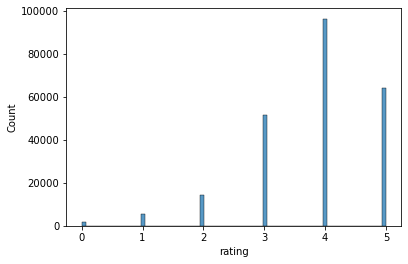

In [26]:
import seaborn as sns
sns.histplot(y)

In [ ]:
#fitting the model-1 and evaluation using mse

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as t
from sklearn.metrics import mean_squared_error 

xtr,xts,ytr,yts = t(x,y, test_size = 0.3)
lm = LinearRegression()
lm.fit(xtr,ytr)
p = lm.predict(xts)
print('mean square error for linear regression : ')
mean_squared_error(yts,p)

In [ ]:
#fitting the model-2 and evaluation using mse
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(xtr,ytr)
p = regressor.predict(xts)
print('mean square error for DecisionTreeRegressor : ')
mean_squared_error(yts,p)

In [28]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split as t
from sklearn import metrics

xtr,xts,ytr,yts = t(x,y, test_size = 0.3)
clf = Perceptron()
clf.fit(xtr, ytr)
preds = clf.predict(xts)
metrics.accuracy_score(yts, preds)

0.29959693556686295

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(xtr, ytr)
preds = clf.predict(xts)
metrics.accuracy_score(yts, preds)

0.41704305071179465